In [1]:
# Pytorch Library
import torch

# Used to help create the dataset and perform mini-batch
from torch.utils.data import Dataset, DataLoader

# PyTorch Neural Network
import torch.nn as nn


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<br>

In [2]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(  self.y*np.log(yhat+1e-16) 
                                            + (1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, 
                                                   rstride=1, cstride=1, 
                                                   cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x[self.y==0], self.y[self.y==0], 'ro', label="training points")
        plt.plot(self.x[self.y==1], self.y[self.y==1]-1, 'o', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')

In [3]:
# Plot the diagram
def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

<br>

In [4]:
# Setting the random seed.
# This will allow us to control randomness and give us reproducibility.
torch.manual_seed(0)

<br>

## Create Dataset

In [5]:
# Create the custom Data class which inherits Dataset
class Data(Dataset):
    
    # Constructor
    def __init__(self):
        # Create X values from -1 to 1 with step .1
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        # Create Y values all set to 0
        self.y = torch.zeros(self.x.shape[0], 1)
        # Set the X values above 0.2 to 1
        self.y[self.x[:, 0] > 0.2] = 1
        # Set the .len attribute because we need to override the __len__ method
        self.len = self.x.shape[0]
    
    # Getter that returns the data at the given index
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length of the dataset
    def __len__(self):
        return self.len

In [6]:
# Create Data object
data_set = Data()

data_set.x
data_set.y

len(data_set)

x,y = data_set[0]
x,y

(tensor([-1.]), tensor([0.]))

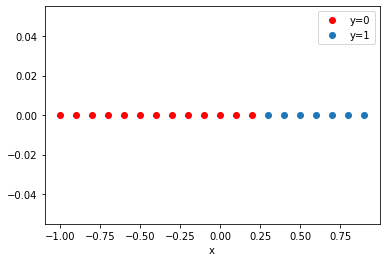

In [7]:
plt.plot(data_set.x[data_set.y==0], data_set.y[data_set.y==0], 'ro', label="y=0")
plt.plot(data_set.x[data_set.y==1], data_set.y[data_set.y==1]-1, 'o', label="y=1")

plt.xlabel('x')
plt.legend()
plt.show()

<br>

## Create Model


### Logistic Regression Model
For Logistic Regression typically we would not use PyTorch instead we would use Scikit-Learn as it is easier to use and set up. We are using PyTorch because it is good practice for deep learning. Scikit-Learn is typically used for Machine Learning while PyTorch is used for Deep Learning.

In [8]:
# Create logistic_regression class that inherits nn.Module which is the base class for all neural networks
class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        # Single layer of Logistic Regression with number of inputs being n_inputs and there being 1 output 
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        # Using the input x value puts it through the single layer defined above then puts the output through 
        # the sigmoid function and returns the result
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [9]:
# Create the logistic_regression result
model = logistic_regression(1)

x = torch.tensor([-1.0])
sigma = model(x)                  # Make a prediction using the model
sigma

tensor([0.6327], grad_fn=<SigmoidBackward0>)

<Figure size 432x288 with 0 Axes>

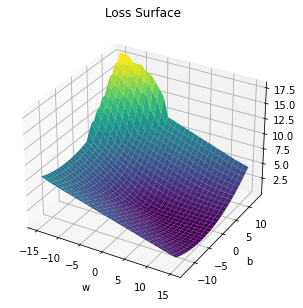

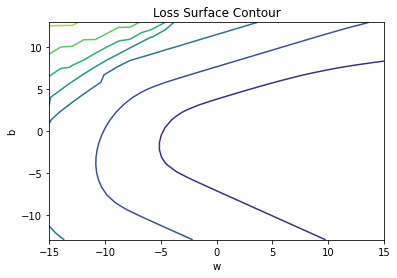

In [10]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1])

# 15 is the range of w
# 13 is the range of b
# data_set[:][0] are all the X values
# data_set[:][1] are all the Y values

<br/>

## Create Total Loss Function (Cost)

### Binary Cross Entropy Loss

In [11]:
# define a criterion using Binary Cross Entropy Loss. 
# This will measure the difference/loss between the prediction and actual value.
criterion = nn.BCELoss()

model = logistic_regression(1)
data_set = Data()                 # Create Data object
x, y = data_set[0]
sigma = model(x)                  # Make a prediction using the model

loss = criterion(sigma, y)
loss

tensor(0.7376, grad_fn=<BinaryCrossEntropyBackward0>)

In [12]:
x,y,sigma

(tensor([-1.]), tensor([0.]), tensor([0.5218], grad_fn=<SigmoidBackward0>))

<br>

## Setting the Batch Size using a DataLoader

In [13]:
batch_size=10
trainloader = DataLoader(dataset = data_set, batch_size = batch_size)

dataset_iter = iter(trainloader)
X,y=next(dataset_iter )

len(X), len(y)

(10, 10)

<br>

## Create Optimizer and Setting Learning Rate

In [14]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<br>

## Train Model

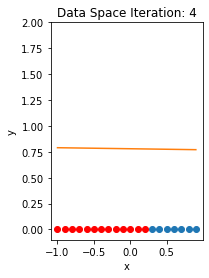

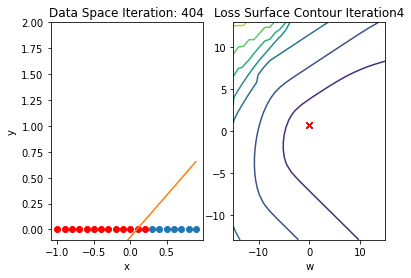

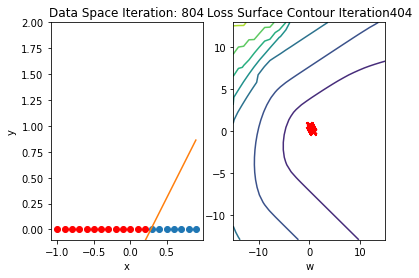

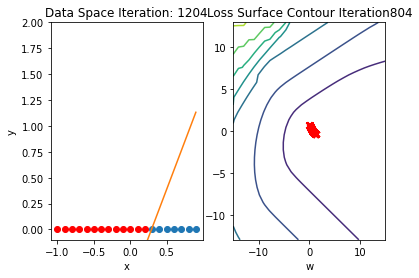

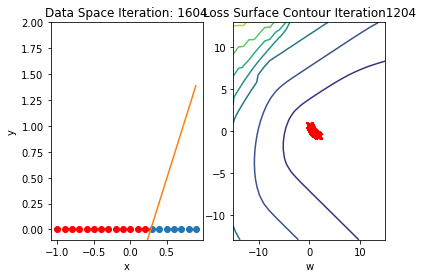

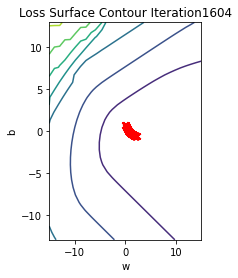

In [15]:
model = logistic_regression(1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = .01)

trainloader = DataLoader(dataset = data_set, batch_size = 5)
epochs=500        # 训练500次，每次训练的迭代次数 iteration_num = num_of_training_set / batch_size
loss_values = []  # Store the loss over iterations so we can plot it at the end


for epoch in range(epochs):
    # For each batch in the training data
    for x, y in trainloader:
        
        # Make our predictions from the X values
        yhat = model(x)
        # Measure the loss between our prediction and actual Y values
        loss = criterion(yhat, y)
        # Resets the calculated gradient value,
        # this must be done each time as it accumulates if we do not reset
        optimizer.zero_grad()
        # Calculates the gradient value with respect to each weight and bias
        loss.backward()
        # Updates the weight and bias according to calculated gradient value
        optimizer.step()
        
        # Set the parameters for the loss surface contour graphs
        get_surface.set_para_loss(model, loss.tolist())
        
        loss_values.append(loss)  # Saves the loss of the iteration
    
    # Print the Data Space for the current iteration every 20 epochs
    if epoch % 100 == 0:
        get_surface.plot_ps()

In [16]:
# See the final values of the weight and bias
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]

In [17]:
# Rounding the prediction to the nearedt integer 0 or 1 representing the classes
yhat = torch.round(yhat)

In [18]:
type(loss_values), len(loss_values)

(list, 2000)

In [19]:
loss_values[:3]

[tensor(1.1771, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(1.1644, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.8451, grad_fn=<BinaryCrossEntropyBackward0>)]

Text(0, 0.5, 'Cost')

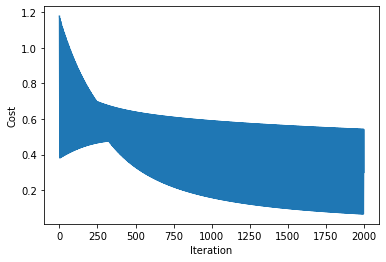

In [20]:
# plt.plot(loss_values) # 会报错：Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
plt.plot([e.detach().numpy() for e in loss_values])
plt.xlabel("Iteration")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

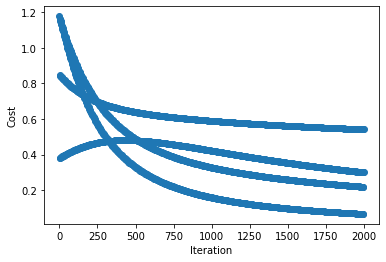

In [21]:
plt.scatter(np.arange(0,2000,1), [e.detach().numpy() for e in loss_values])
plt.xlabel("Iteration")
plt.ylabel("Cost")